# Graphs

Graphing data...

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from scipy.optimize import curve_fit

In [16]:
crabs = np.loadtxt('data/crab.tsv', delimiter='\t')
crocs = np.loadtxt('data/croc.tsv', delimiter='\t')
goos = np.loadtxt('data/goo.tsv', delimiter='\t')
snakes = np.loadtxt('data/snake.tsv', delimiter='\t')

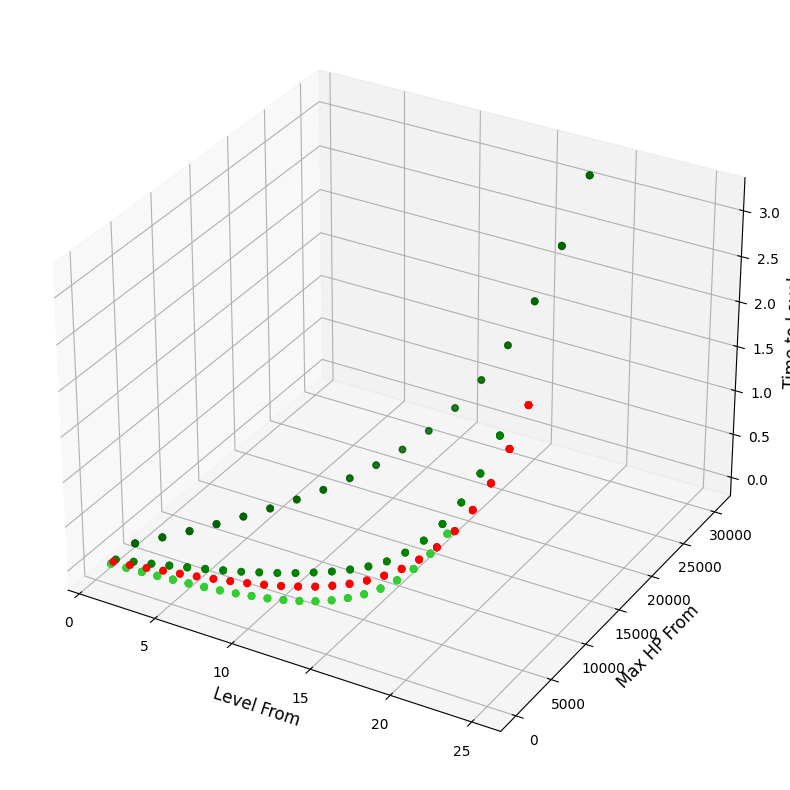

In [17]:
graph = plt.figure()
graph.set_figwidth(40)
graph.set_figheight(10)
ax = plt.axes(projection='3d')
ax.set_xlabel('Level From', fontsize=12)
ax.set_ylabel('Max HP From', fontsize=12)
ax.set_zlabel('Time to Level', fontsize=12)

ax.scatter3D(crabs[:, 1], crabs[:, 3], crabs[:, 0], color='red')
ax.scatter3D(crocs[:, 1], crocs[:, 3], crocs[:, 0], color='darkgreen')
ax.scatter3D(goos[:, 1], goos[:, 3], goos[:, 0], color='limegreen')
ax.scatter3D(snakes[:, 1], snakes[:, 3], snakes[:, 0], color='green')

plt.show()

In [18]:
def f(X, a, b, c, d, e, f):
    level, hp = X
    return a + (b * level) + (c * (level ** 2)) + (d * hp) + (e * (hp ** 2)) + (f ** level)

X1 = np.concatenate((crabs[:, 1], crocs[:, 1], goos[:, 1], snakes[:, 1]))
X2 = np.concatenate((crabs[:, 3], crocs[:, 3], goos[:, 3], snakes[:, 3]))
Y = np.concatenate((crabs[:, 0], crocs[:, 0], goos[:, 0], snakes[:, 0]))

popt, pcov = curve_fit(f, (X1, X2), Y)

In [19]:
popt

array([ 2.60594713e+06, -8.76720909e+05,  6.60732623e+04, -2.31161874e+02,
        2.69660736e-02, -9.15913297e-01])

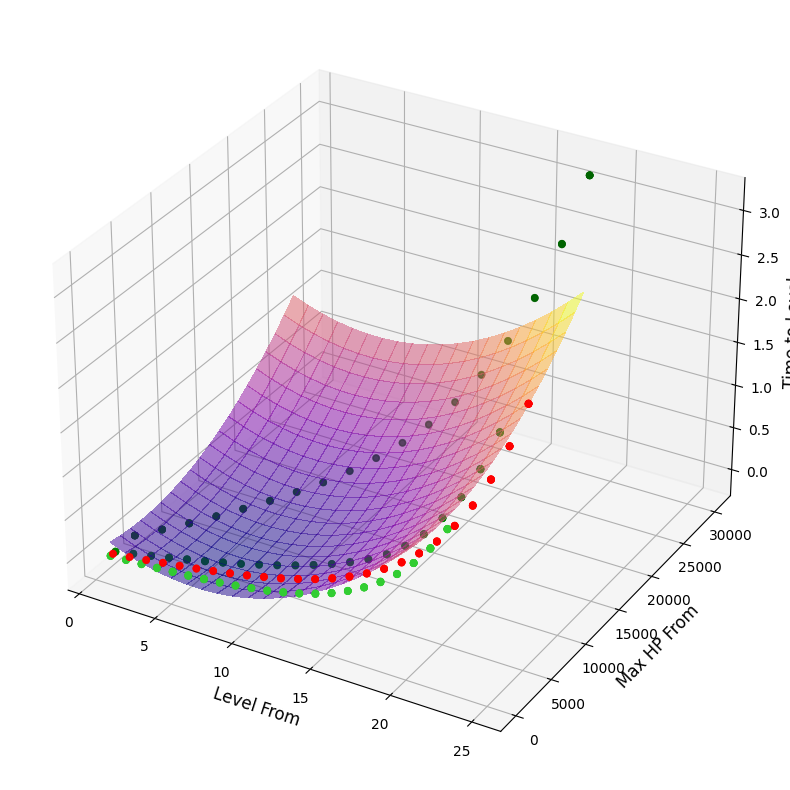

In [20]:
graph = plt.figure()
graph.set_figwidth(40)
graph.set_figheight(10)
ax = plt.axes(projection='3d')
ax.set_xlabel('Level From', fontsize=12)
ax.set_ylabel('Max HP From', fontsize=12)
ax.set_zlabel('Time to Level', fontsize=12)

ax.scatter3D(crabs[:, 1], crabs[:, 3], crabs[:, 0], color='red')
ax.scatter3D(crocs[:, 1], crocs[:, 3], crocs[:, 0], color='darkgreen')
ax.scatter3D(goos[:, 1], goos[:, 3], goos[:, 0], color='limegreen')
ax.scatter3D(snakes[:, 1], snakes[:, 3], snakes[:, 0], color='green')

LEVELS = np.linspace(1, 20, 20)
MAX_HP = np.linspace(100, 25000, 20)
X, Y = np.meshgrid(LEVELS, MAX_HP)
Z = f((X, Y), popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])
surf = ax.plot_surface(X, Y, Z, cmap=cm.plasma, alpha=0.5, linewidth=0, antialiased=False)

plt.show()

In [21]:
print(f"{popt[0]} + ({popt[1]} * level) + ({popt[2]} * (level ** 2)) + ({popt[3]} * hp) + ({popt[4]} * (hp ** 2)) + ({popt[5]} ** level)")

2605947.134990056 + (-876720.9086715562 * level) + (66073.26227601874 * (level ** 2)) + (-231.16187437227634 * hp) + (0.026966073553584314 * (hp ** 2)) + (-0.9159132972853132 ** level)
